# Machine Learning 과정
- 문제정의
- 데이터 수집
- 데이터 전처리 (인코딩,특성공학)
- 탐색적 데이터 분석 (시각화, 특성선택)
- 모델 선택 및 학습
- 하이퍼파라미터 튜닝 (교차검증,그리드서치)
- 모델 평가

In [52]:
%matplotlib inline

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [53]:
data = pd.read_csv('./data/train.csv')

In [54]:
data.shape

(891, 12)

In [55]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 데이터 사전
- PassengerId : 탑승객 id
- Survived : 생존여부 (0 = 사망, 1 = 생존)
- Pclass : 티켓 클래스 (1등급, 2등급, 3등급)
- Name : 이름
- Sex : 성별 (male = 남성, female = 여성)
- Age : 나이
- SibSp : 형제/배우자의 수
- Parch : 부모/자녀 수
- Ticket : 티켓 번호
- Fare : 요금
- Cabin : 객실번호
- Embarked : 승선항 C = 쉘 부르그, Q = 퀸즈타운, S = 사우스 햄튼

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


비어있는 나이는 중간 값으로 채우자 (중간 값으로 하면 이상치에 대해 보완가능)

In [57]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


시각화 편의를 위해 Died 컬럼 추가

In [59]:
data['Died'] = 1 - data['Survived']

### 성별과의 관계

In [60]:
data.groupby('Sex').sum()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Died
Sex,,,,,,,,
female,135343,233,678,8770.00,218,204,13966.6628,81
male,262043,109,1379,17391.17,248,136,14727.2865,468


In [61]:
data.groupby('Sex').sum()[['Survived', 'Died']]

,Survived,Died
Sex,,
female,233,81
male,109,468


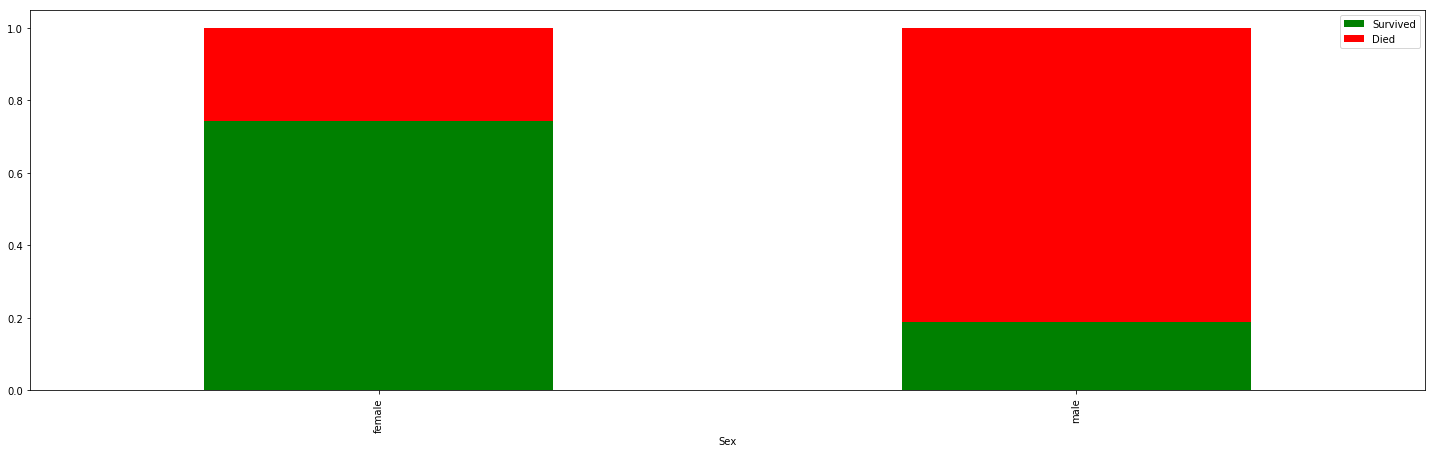

In [62]:
data.groupby('Sex').mean()[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7), 
                                                           stacked=True, color=['g', 'r']);

남성이 많이 죽고 여성이 많이 살았다. (성별 컬럼은 생존과 관계가 많다)

### 나이와의 관계

C:\Users\MH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


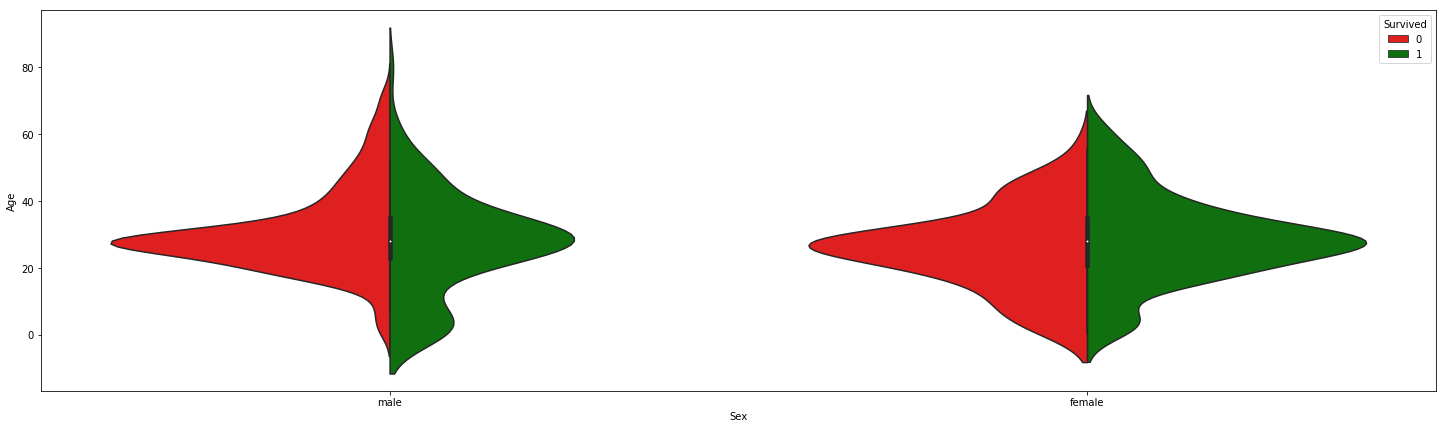

In [63]:
fig = plt.figure(figsize=(25, 7)) #그림 크기 지정
sns.violinplot(x='Sex', y='Age', #바이올린 그래프
               hue='Survived', data=data, 
               split=True,#따로 떨어져서 보임
               palette={0: "r", 1: "g"}
              )

C:\Users\MH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


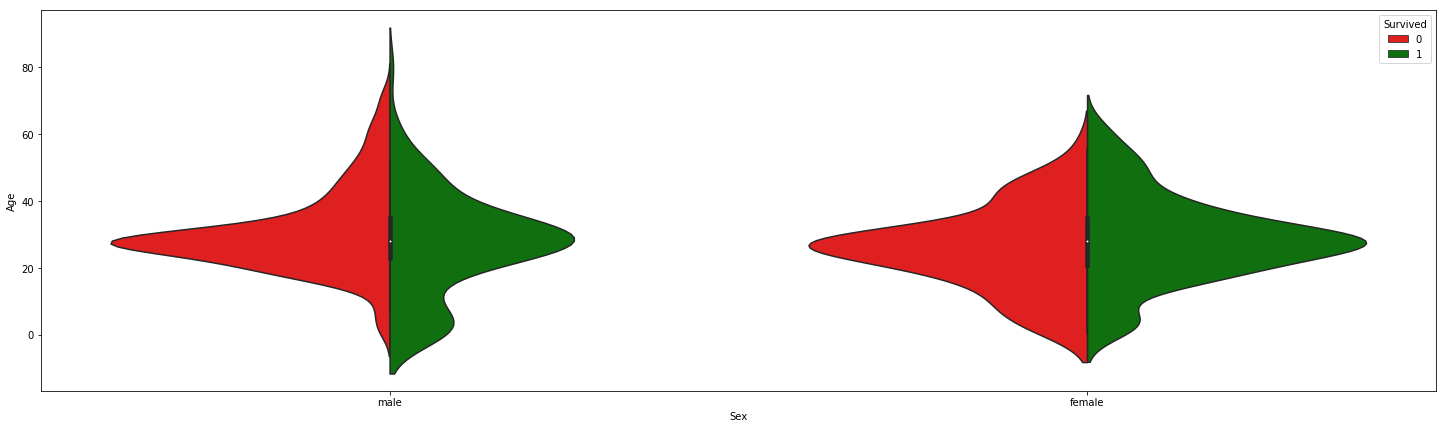

In [64]:
fig = plt.figure(figsize=(25, 7)) #그림 크기 지정
sns.violinplot(x='Sex', y='Age', #바이올린 그래프
               hue='Survived', data=data, 
               split=True,
               palette={0: "r", 1: "g"}
              )

- 남성 탑승객중 어린아이들이 조금 더 많이 살았다.
- 20~40 탑승객(남,여 모두)이 많이 사망했다.

### 요금과의 관계

C:\Users\MH\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


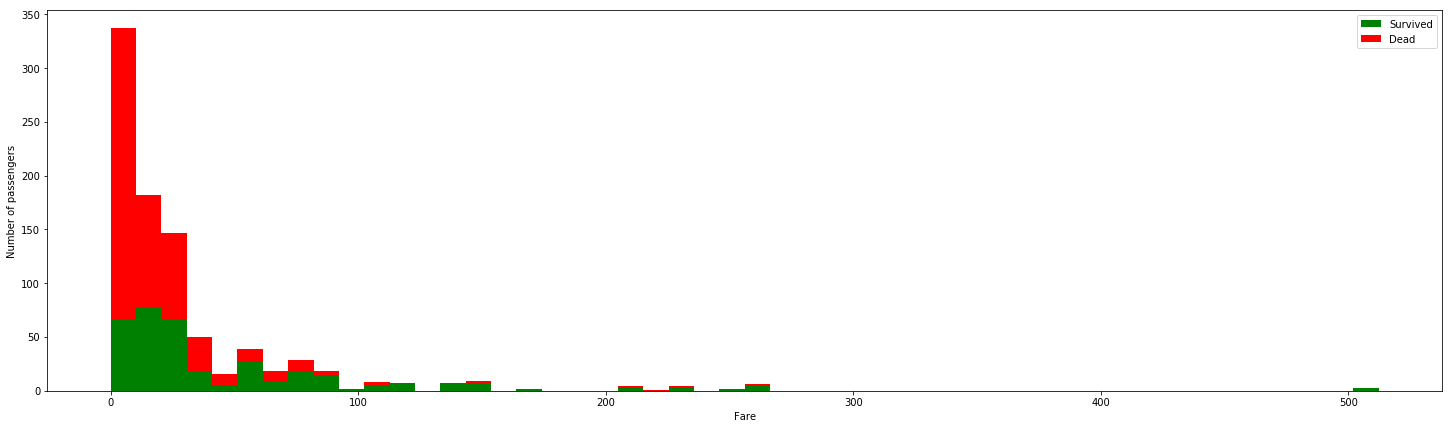

In [65]:
figure = plt.figure(figsize=(25, 7))
plt.hist([data[data['Survived'] == 1]['Fare'], data[data['Survived'] == 0]['Fare']], 
         stacked=True, color = ['g','r'],
         bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend();

티켓 요금이 낮으면 많이 죽었다.

### 티켓요금과 선실등급과의 관계

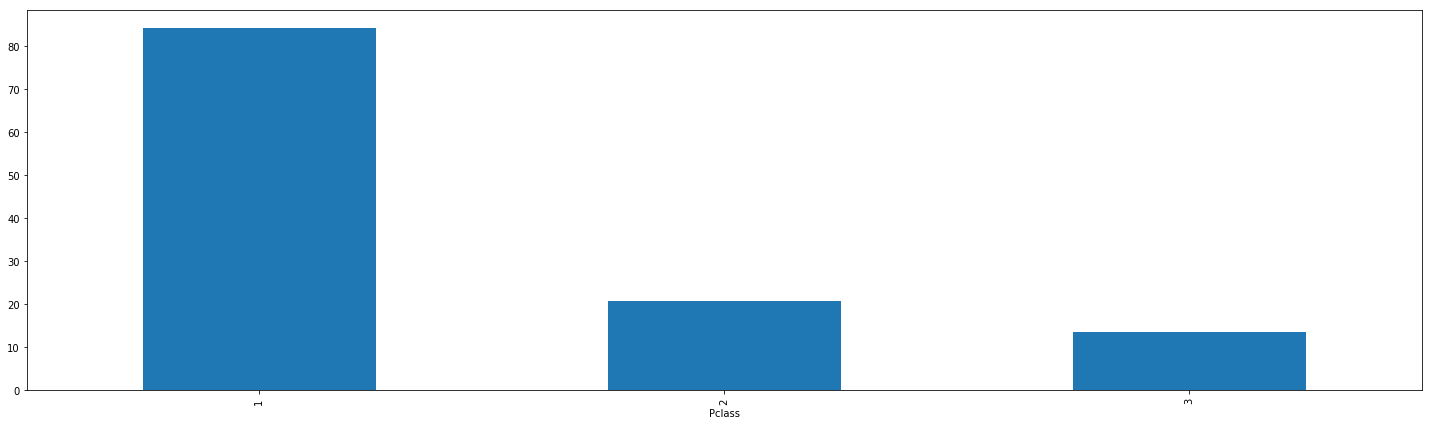

In [66]:
data.groupby('Pclass').mean()['Fare'].plot(kind='bar', figsize=(25, 7))

선실등급이 낮을 수록 티켓 가격이 싸다

### 승선항과의 관계

C:\Users\MH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


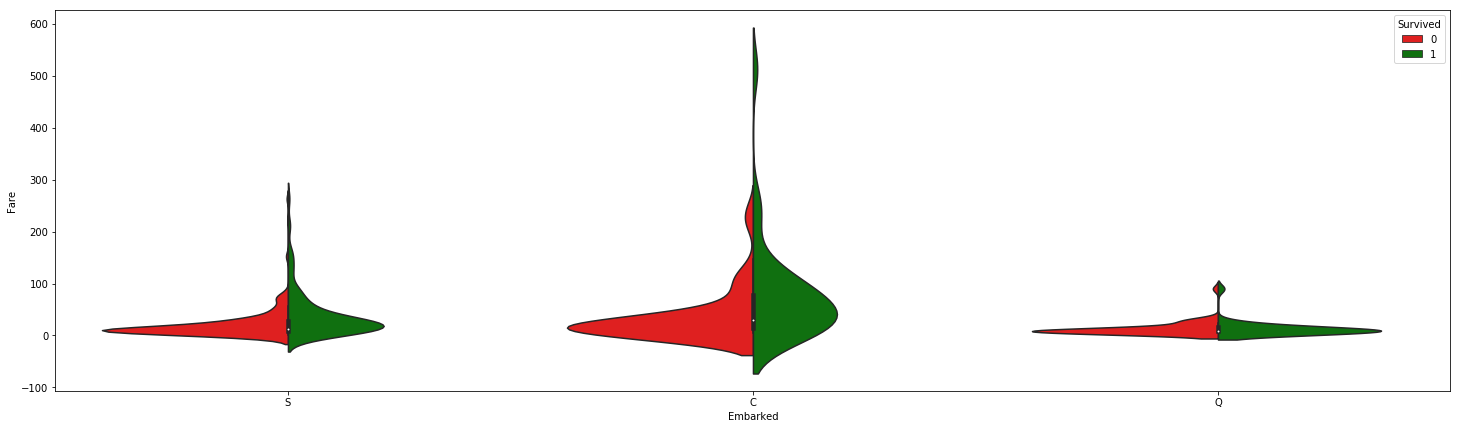

In [67]:
fig = plt.figure(figsize=(25, 7))
sns.violinplot(x='Embarked', y='Fare', hue='Survived', data=data, split=True, palette={0: "r", 1: "g"});

- C,S는 요금 폭이 넓다
- 요금이 높은 사람들은 거의 죽지 않았다.

# Feature engineering

###  데이터로드
train과 test를 병합해서 사용(한번에 처리하기위해)

In [107]:
# train,test 데이터 로드
train = pd.read_csv('./data/train.csv')    
test = pd.read_csv('./data/test.csv')

# 생존여부를 별도로 분리
# inplace 속성으로 drop결과를 바로 적용
targets = train.Survived
train.drop(['Survived'], axis = 1, inplace=True)
    
# 두 개의 데이터 병합
# ignore_index 속성으로 train,test의 인덱스를 순차적으로 만듬
# 각자의 인덱스를 무시하고 다시 셋팅한다. 
combined = train.append(test,ignore_index=True)
    
# PassengerId는 삭제
combined.drop(['PassengerId'], 1, inplace=True)
combined

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,NaN,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,NaN,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,NaN,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,NaN,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,NaN,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,NaN,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,NaN,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,male,3,NaN,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female,0,NaN,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,2,female,1,NaN,237736


In [71]:
combined.shape

(1309, 11)

In [72]:
combined.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,NaN,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,NaN,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,NaN,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,NaN,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,NaN,373450


### 탑승객 호칭 처리

- Braund, <b> Mr.</b> Owen Harris	
- Heikkinen, <b>Miss.</b> Laina
- Oliva y Ocana, <b>Dona.</b> Fermina (귀부인)
- Peter, <b>Master.</b> Michael J (도련님)

In [73]:
def split_title(x):
    return x.split(',')[1].split('.')[0].strip()

In [74]:
titles = data["Name"].apply(split_title).unique()
titles

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

몇 개의 타이틀로 정리

- Officer (장교)
- Royalty (귀족)
- Mr
- Mrs
- Miss
- Master

In [75]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

In [76]:
combined['Title'] = combined["Name"].apply(split_title)
#map함수를 통해 딕셔너리의 키 값과 시리즈의 인덱스 값이 같은 데이터를 찾아 변경
combined['Title'] = combined.Title.map(Title_Dictionary)

In [77]:
combined.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,NaN,A/5 21171,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,NaN,PC 17599,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,NaN,STON/O2. 3101282,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,NaN,113803,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,NaN,373450,Mr


### 나이 처리

- 시각화를 위해 중간 값으로 단순히 처리했지만, 좀 더 세분화 해서 나이를 채워보자
- 성별,선실등급,호칭으로 묶어서 평균나이를 구해보자

In [92]:
# as_index 속성으로 그룹을 묶는 컬럼을 인덱스에서 제외하자
#891까지 자르는 이유는 test에 train의 정보를 누수하는 느낌
grouped_train = combined.iloc[:891].groupby(['Sex','Pclass','Title'],as_index = False)
grouped_median_train = grouped_train.median()
grouped_median_train = grouped_median_train[['Sex', 'Pclass', 'Title', 'Age']]
grouped_median_train

,Sex,Pclass,Title,Age
0,female,1,Miss,30.0
1,female,1,Mrs,40.0
2,female,1,Officer,49.0
3,female,1,Royalty,40.5
4,female,2,Miss,24.0
5,female,2,Mrs,31.5
6,female,3,Miss,18.0
7,female,3,Mrs,31.0
8,male,1,Master,4.0
9,male,1,Mr,40.0


성별과 선실등급 그리고 호칭에 따라 평균 나이가 조금씩 다르다.

In [104]:
def fill_age(row):
    condition = (
            (grouped_median_train['Sex'] == row['Sex']) & 
            (grouped_median_train['Title'] == row['Title']) & 
            (grouped_median_train['Pclass'] == row['Pclass'])
        ) 
    if np.isnan(row['Age']): 
        return grouped_median_train[condition]['Age'].values[0]
    else :
        return row['Age']#null이 아니라면 원래나이

In [105]:
combined['Age'] = combined.apply(fill_age, axis=1)

### 이름 처리
- 이름 특성 삭제
- 카테고리화 되어있는 호칭을 Model이 계산 할 수 있도록 one-hot-encoding

In [29]:
#이름 특성 삭제
combined.drop('Name', axis=1, inplace=True)

In [30]:
titles_dummies = pd.get_dummies(combined['Title'], prefix='Title')
titles_dummies.head()

,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0


In [31]:
combined = pd.concat([combined, titles_dummies], axis=1)
combined.drop('Title', axis=1, inplace=True)

In [32]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0
3,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0,0
4,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,0


### 요금 처리

In [33]:
combined.Fare.fillna(combined.Fare.mean(), inplace=True)

### 승선항 처리

- 결측치는 많은 사람들이 탑승한 S로 채운다
- encoding

In [35]:
combined.iloc[:891].Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [36]:
# 결측치 처리
combined.Embarked.fillna('S', inplace=True)
    
# one-hot-encoding
embarked_dummies = pd.get_dummies(combined['Embarked'], prefix='Embarked')
combined = pd.concat([combined, embarked_dummies], axis=1)

# 승선항 특성 삭제
combined.drop('Embarked', axis=1, inplace=True)

In [37]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,0,0,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,C85,0,0,0,1,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,0,0,0,0,1
3,1,female,35.0,1,0,113803,53.1000,C123,0,0,0,1,0,0,0,0,1
4,3,male,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,0,0,0,1


### 객실번호 
- 결측치는 U(Uknown)로 대체
- 숫자를 제거한 맨 앞 글자로 변경
- encoding

In [38]:
# 결측치는 U로 대체
combined['Cabin'].fillna('U',inplace=True)

In [39]:
# Cabin의 첫 글자로 변경
combined['Cabin'] = combined['Cabin'].str[0]

In [40]:
# one-hot-encoding
cabin_dummies = pd.get_dummies(combined['Cabin'], prefix='Cabin')    
combined = pd.concat([combined, cabin_dummies], axis=1)

# Cabin 특성 삭제
combined.drop('Cabin', axis=1, inplace=True)

In [41]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,...,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,3,male,22.0,1,0,A/5 21171,7.2500,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,female,35.0,1,0,113803,53.1000,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,3,male,35.0,0,0,373450,8.0500,0,0,1,...,1,0,0,0,0,0,0,0,0,1


### 성별 처리

In [42]:
combined['Sex'] = combined['Sex'].map({'male':1, 'female':0})

남성은 1 여성은 0으로 변경

In [43]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,...,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,3,1,22.0,1,0,A/5 21171,7.2500,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,0,38.0,1,0,PC 17599,71.2833,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,0,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,0,35.0,1,0,113803,53.1000,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,3,1,35.0,0,0,373450,8.0500,0,0,1,...,1,0,0,0,0,0,0,0,0,1


### 객실등급 처리

In [44]:
# one-hot-encoding
pclass_dummies = pd.get_dummies(combined['Pclass'], prefix="Pclass")
combined = pd.concat([combined, pclass_dummies],axis=1)
    
# 객실등급 특성 삭제
combined.drop('Pclass',axis=1,inplace=True)

In [45]:
combined.head()

,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3
0,1,22.0,1,0,A/5 21171,7.2500,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1,0,38.0,1,0,PC 17599,71.2833,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,0,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,35.0,1,0,113803,53.1000,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,1,35.0,0,0,373450,8.0500,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


### 티켓 처리

In [46]:
def cleanTicket(ticket):
    # .과/를 없애준다.
    ticket = ticket.replace('.', '')
    ticket = ticket.replace('/', '')
    # 공백 기준으로 자른다.
    ticket = ticket.split()
    print(ticket)
    # 자른 리스트의 각 항목의 양쪽 공백을 없애준다.
    ticket = map(lambda t : t.strip(), ticket)
    # 숫자가 아닌 것만 필터링해서 리스트로 만듬
    # isdigit 숫자로만 구성된 문자열을 감지
    ticket = list(filter(lambda t : not t.isdigit(), ticket))
    if len(ticket) > 0:
        return ticket[0]
    else: 
        return 'XXX' #티켓 글자가 없으면 XXX로 표시

In [47]:
combined['Ticket'] = combined['Ticket'].map(cleanTicket)
tickets_dummies = pd.get_dummies(combined['Ticket'], prefix='Ticket')
combined = pd.concat([combined, tickets_dummies], axis=1)
combined.drop('Ticket', inplace=True, axis=1)

['A5', '21171']
['PC', '17599']
['STONO2', '3101282']
['113803']
['373450']
['330877']
['17463']
['349909']
['347742']
['237736']
['PP', '9549']
['113783']
['A5', '2151']
['347082']
['350406']
['248706']
['382652']
['244373']
['345763']
['2649']
['239865']
['248698']
['330923']
['113788']
['349909']
['347077']
['2631']
['19950']
['330959']
['349216']
['PC', '17601']
['PC', '17569']
['335677']
['CA', '24579']
['PC', '17604']
['113789']
['2677']
['A5', '2152']
['345764']
['2651']
['7546']
['11668']
['349253']
['SCParis', '2123']
['330958']
['SCA4', '23567']
['370371']
['14311']
['2662']
['349237']
['3101295']
['A4', '39886']
['PC', '17572']
['2926']
['113509']
['19947']
['CA', '31026']
['2697']
['CA', '34651']
['CA', '2144']
['2669']
['113572']
['36973']
['347088']
['PC', '17605']
['2661']
['CA', '29395']
['SP', '3464']
['3101281']
['315151']
['CA', '33111']
['CA', '2144']
['SOC', '14879']
['2680']
['1601']
['348123']
['349208']
['374746']
['248738']
['364516']
['345767']
['345779']
['33

['348122']
['386525']
['PC', '17608']
['349232']
['237216']
['347090']
['334914']
['PC', '17608']
['FCC', '13534']
['330963']
['113796']
['2543']
['19950']
['382653']
['349211']
['3101297']
['PC', '17562']
['113503']
['113503']
['359306']
['11770']
['248744']
['368702']
['2678']
['PC', '17483']
['19924']
['349238']
['240261']
['2660']
['330844']
['A4', '31416']
['364856']
['29103']
['347072']
['345498']
['FC', '12750']
['376563']
['13905']
['350033']
['19877']
['STONO', '2', '3101268']
['347471']
['A5', '3338']
['11778']
['228414']
['365235']
['347070']
['2625']
['C', '4001']
['330920']
['383162']
['3410']
['248734']
['237734']
['330968']
['PC', '17531']
['329944']
['PC', '17483']
['2680']
['2681']
['PP', '9549']
['13050']
['SCAH', '29037']
['CA', '33595']
['367227']
['13236']
['392095']
['368783']
['371362']
['350045']
['367226']
['211535']
['342441']
['STONOQ', '369943']
['113780']
['4133']
['2621']
['349226']
['350409']
['2656']
['248659']
['SOTONOQ', '392083']
['CA', '2144']
['CA',

In [48]:
combined.head()

,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,...,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX
0,1,22.0,1,0,7.2500,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,38.0,1,0,71.2833,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,26.0,0,0,7.9250,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,35.0,1,0,53.1000,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,35.0,0,0,8.0500,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


### 가족관련 특성 처리
- 부모,자녀,배우자,형제 모두 합친 특성을 새롭게 만듬
- 가족 숫자에 따라 1인, 소규모 가족, 대규모 가족으로 구분

In [49]:
# 본인을 포함하여 모든 가족수 특성 생성
combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1

# map함수는 apply처럼 함수를 넣어서 사용가능
# lambda는 간단한 함수를 줄여서 쓰는 방식
combined['Singleton'] = combined['FamilySize'].map(lambda s: 1 if s == 1 else 0)
combined['SmallFamily'] = combined['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
combined['LargeFamily'] = combined['FamilySize'].map(lambda s: 1 if 5 <= s else 0)

In [50]:
combined.head()

,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,...,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,22.0,1,0,7.2500,0,0,1,0,0,...,0,0,0,0,0,0,2,0,1,0
1,0,38.0,1,0,71.2833,0,0,0,1,0,...,0,0,0,0,0,0,2,0,1,0
2,0,26.0,0,0,7.9250,0,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
3,0,35.0,1,0,53.1000,0,0,0,1,0,...,0,0,0,0,0,1,2,0,1,0
4,1,35.0,0,0,8.0500,0,0,1,0,0,...,0,0,0,0,0,1,1,1,0,0


# Modeling

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

train과 test를 분리

In [53]:
train = combined.iloc[:891]
test = combined.iloc[891:]

cross validation 함수 만들기

In [54]:
def compute_score(clf3, X, y, scoring='accuracy'):
    xval = cross_val_score(clf3, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [55]:
clf = RandomForestClassifier(n_estimators=20)
clf = clf.fit(train, targets)

In [56]:
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

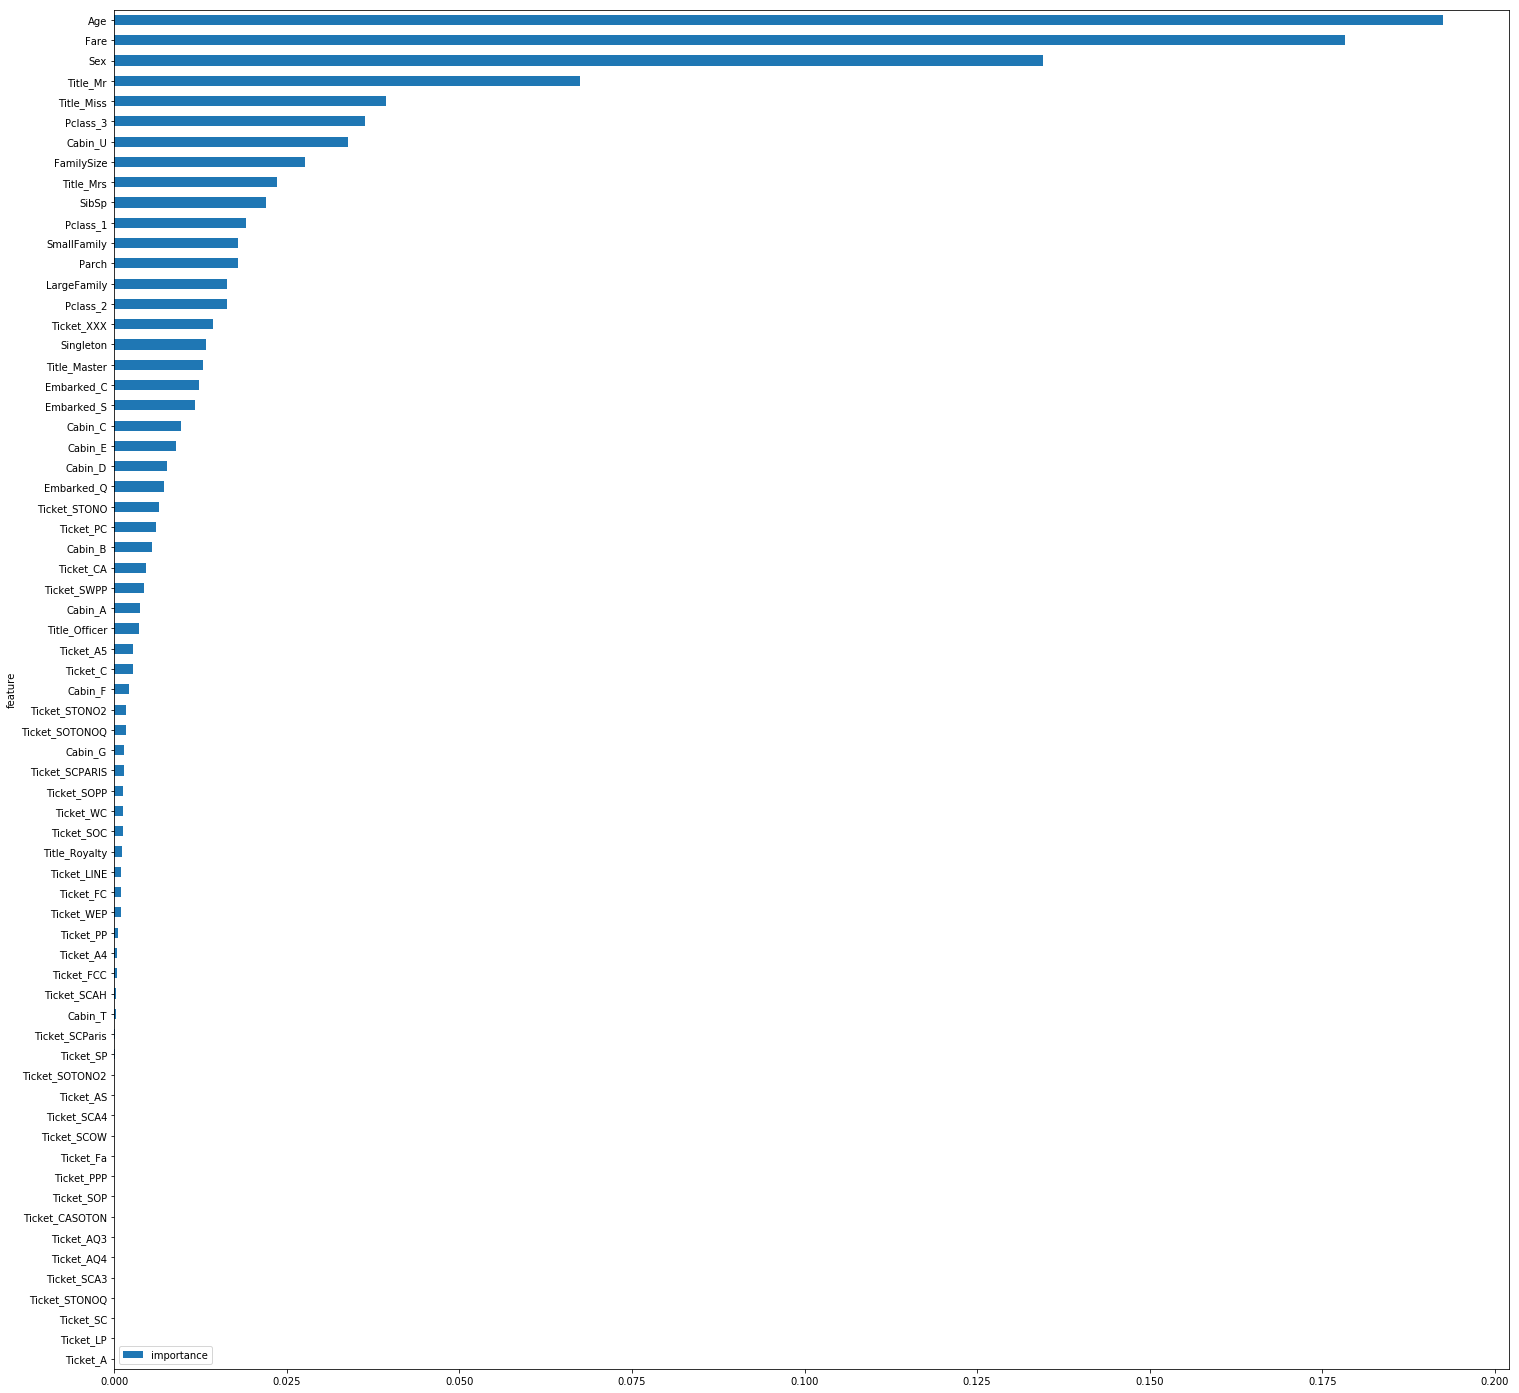

In [58]:
features.plot(kind='barh', figsize=(25, 25))

Title_Mr, Age, Fare, Sex 등이 중요한 특성으로 나타난다

In [59]:
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(clf, prefit=True)

# 모든 특성 중요도 값의 평균 이상인 특성들을 선택
# threshold를 이용해 임계치 지정가능
train_reduced = model.transform(train)
train_reduced.shape

C:\Users\HHD\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:93: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


(891, 15)

In [60]:
test_reduced = model.transform(test)
test_reduced.shape

C:\Users\HHD\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:93: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


(418, 15)

In [61]:
clf = clf.fit(train_reduced, targets)

In [62]:
result = compute_score(clf,train_reduced,targets)
np.mean(result)

0.8148745277568838

In [63]:
predict_result = clf.predict(test_reduced)
predict_result

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [64]:
df_output = pd.DataFrame()
aux = pd.read_csv('./data/test.csv')
df_output['PassengerId'] = aux['PassengerId']
df_output['Survived'] = predict_result
df_output.to_csv('result_submit.csv',index=False)

In [65]:
from sklearn.model_selection import GridSearchCV
m = RandomForestClassifier(random_state=92)
param_grid = {'max_depth': [3,5,7,9], # 트리의 노드 깊이
             "n_estimators":[10,30,50,100], # 트리의 개수
             "max_features":[0.2,0.4,0.6], # 하나의 노드에서 고려될 특성의 범위(0.2 = 전체 특성 중 20%만 선택)
             'min_samples_leaf': [10,30,50] # 리프 노드에서 최소 존재해야할 샘플의 개수 (과대적합을 보완해줌)
             }
grid = GridSearchCV(m, param_grid, cv=5)
grid.fit(train_reduced, targets)
print("최상의 크로스 밸리데이션 점수: {:.2f}".format(grid.best_score_))
print("최적의 매개변수: ", grid.best_params_)

최상의 크로스 밸리데이션 점수: 0.83
최적의 매개변수:  {'max_depth': 5, 'max_features': 0.4, 'min_samples_leaf': 10, 'n_estimators': 50}


In [66]:
final_model = RandomForestClassifier(random_state=92,max_depth=5,max_features=0.4,min_samples_leaf=10,n_estimators=50)
final_model.fit(train_reduced, targets)
predict_result = final_model.predict(test_reduced)
df_output = pd.DataFrame()
aux = pd.read_csv('./data/test.csv')
df_output['PassengerId'] = aux['PassengerId']
df_output['Survived'] = predict_result
df_output.to_csv('result_submit.csv',index=False)

In [67]:
grid.cv_results_

{'mean_fit_time': array([0.11227584, 0.24936457, 0.18812556, 0.42668557, 0.03182101,
        0.07405124, 0.14850073, 0.39026132, 0.12208109, 0.25536971,
        0.28559008, 0.33142209, 0.02621751, 0.07965322, 0.1040689 ,
        0.33922863, 0.0784533 , 0.32241516, 0.37505045, 0.29419632,
        0.03262229, 0.07605133, 0.11147418, 0.61641307, 0.08085566,
        0.26697707, 0.32461777, 0.40026917, 0.04703317, 0.10486975,
        0.1300878 , 0.1969317 , 0.02001395, 0.0568387 , 0.42648377,
        0.792132  , 0.08025675, 0.22394924, 0.36864491, 0.61821265,
        0.04122839, 0.0912611 , 0.12868619, 0.20993977, 0.01921182,
        0.05543694, 0.09226184, 0.46651235, 0.11147523, 0.22574902,
        0.23055382, 0.34703207, 0.02401633, 0.07044678, 0.25237031,
        0.680655  , 0.0324223 , 0.08845878, 0.15870485, 0.31881337,
        0.03582377, 0.10907393, 0.18632417, 0.25717144, 0.0258173 ,
        0.07384934, 0.12048135, 0.25717111, 0.02621813, 0.07184892,
        0.11707764, 0.73088632,

In [71]:
score = pd.DataFrame(grid.cv_results_['params'])
score["mean_test_score"]=grid.cv_results_['mean_test_score']
score

,max_depth,max_features,min_samples_leaf,n_estimators,mean_test_score
0,3,0.2,10,10,0.802469
1,3,0.2,10,30,0.811448
2,3,0.2,10,50,0.821549
3,3,0.2,10,100,0.817059
4,3,0.2,30,10,0.808081
5,3,0.2,30,30,0.795735
6,3,0.2,30,50,0.802469
7,3,0.2,30,100,0.787879
8,3,0.2,50,10,0.784512
9,3,0.2,50,30,0.794613


In [77]:
group1 = score.groupby(as_index=False,by=["max_depth","max_features"]).mean()
group1

,max_depth,max_features,min_samples_leaf,n_estimators,mean_test_score
0,3,0.2,30.0,47.5,0.799289
1,3,0.4,30.0,47.5,0.807894
2,3,0.6,30.0,47.5,0.802095
3,5,0.2,30.0,47.5,0.803404
4,5,0.4,30.0,47.5,0.808548
5,5,0.6,30.0,47.5,0.802282
6,7,0.2,30.0,47.5,0.804433
7,7,0.4,30.0,47.5,0.806491
8,7,0.6,30.0,47.5,0.800879
9,9,0.2,30.0,47.5,0.804340


In [79]:
s1 = group1["mean_test_score"].reshape(-1, 3)
s1

C:\Users\HHD\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


array([[0.79928919, 0.80789375, 0.80209502],
       [0.80340441, 0.80854845, 0.80228208],
       [0.80443322, 0.80649083, 0.80087916],
       [0.80433969, 0.80723906, 0.80031799]])

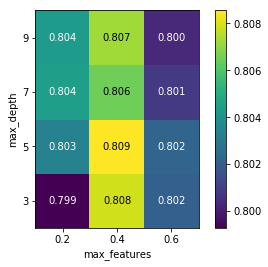

In [81]:
import mglearn

heatmap = mglearn.tools.heatmap(
    s1, xlabel="max_features", ylabel="max_depth", cmap="viridis", fmt="%.3f",
    xticklabels=[0.2,0.4,0.6],
    yticklabels=[3,5,7,9])
plt.colorbar(heatmap)

In [86]:
group2 = score.groupby(as_index=False,by=["n_estimators","min_samples_leaf"]).mean()
group2

,n_estimators,min_samples_leaf,max_depth,max_features,mean_test_score
0,10,10,6,0.4,0.818462
1,10,30,6,0.4,0.805368
2,10,50,6,0.4,0.785166
3,30,10,6,0.4,0.821923
4,30,30,6,0.4,0.799009
5,30,50,6,0.4,0.789562
6,50,10,6,0.4,0.823513
7,50,30,6,0.4,0.805181
8,50,50,6,0.4,0.786289
9,100,10,6,0.4,0.824074


In [87]:
s2 = group2["mean_test_score"].reshape(-1, 3)
s2

C:\Users\HHD\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


array([[0.8184624 , 0.8053685 , 0.78516648],
       [0.82192293, 0.7990086 , 0.78956229],
       [0.82351291, 0.80518144, 0.78628881],
       [0.82407407, 0.80153386, 0.78713056]])

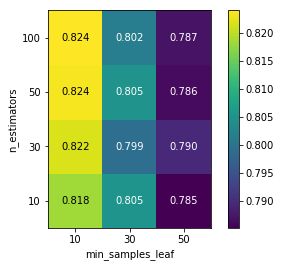

In [88]:
heatmap = mglearn.tools.heatmap(
    s2, xlabel="min_samples_leaf", ylabel="n_estimators", cmap="viridis", fmt="%.3f",
    xticklabels=[10,30,50],
    yticklabels=[10,30,50,100])
plt.colorbar(heatmap)

In [89]:
from sklearn.model_selection import GridSearchCV
m = RandomForestClassifier(random_state=92)
param_grid = {'max_depth': [3,5,7,9], # 트리의 노드 깊이
             "n_estimators":[120,150,200], # 트리의 개수
             "max_features":[0.2,0.4,0.6], # 하나의 노드에서 고려될 특성의 범위(0.2 = 전체 특성 중 20%만 선택)
             'min_samples_leaf': [3,5,7] # 리프 노드에서 최소 존재해야할 샘플의 개수 (과대적합을 보완해줌)
             }
grid = GridSearchCV(m, param_grid, cv=5)
grid.fit(train_reduced, targets)
print("최상의 크로스 밸리데이션 점수: {:.2f}".format(grid.best_score_))
print("최적의 매개변수: ", grid.best_params_)

최상의 크로스 밸리데이션 점수: 0.83
최적의 매개변수:  {'max_depth': 9, 'max_features': 0.4, 'min_samples_leaf': 3, 'n_estimators': 120}


In [92]:
final_model = RandomForestClassifier(random_state=92,max_depth=5,max_features=0.4,min_samples_leaf=7,n_estimators=120)
final_model.fit(train_reduced, targets)
predict_result = final_model.predict(test_reduced)
df_output = pd.DataFrame()
aux = pd.read_csv('./test.csv')
df_output['PassengerId'] = aux['PassengerId']
df_output['Survived'] = predict_result
df_output.to_csv('result_submit.csv',index=False)